In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import time

2024-12-04 14:39:22.951565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-04 14:39:23.029499: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 14:39:23.048896: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 14:39:23.373165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

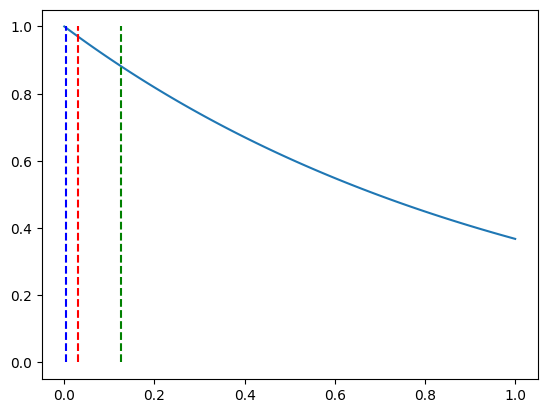

In [2]:
def f(x):
    return np.e**(-x)

x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
plt.plot([1/32, 1/32], [0, 1], 'r--')
plt.plot([1/256, 1/256], [0, 1], 'b--')
plt.plot([1/8, 1/8], [0, 1], 'g--')

In [3]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
# X = minmax_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=5000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

/home/yuwang/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

PPinv = SSNP()
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), RBFinv())
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), Pinv_ilamp())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

Epoch 1/100


2024-12-04 15:44:58.486335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-04 15:44:58.504521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-04 15:44:58.504665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-04 15:44:58.505032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

 83/149 [===============>..............] - ETA: 0s - loss: 2.9791 - main_output_loss: 1.4501 - decoder_output_loss: 0.3496 - main_output_accuracy: 0.4292 - decoder_output_accuracy: 0.0072    

2024-12-04 15:44:59.265187: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


149/149 [==============================] - 1s 3ms/step - loss: 2.4968 - main_output_loss: 1.2243 - decoder_output_loss: 0.3044 - main_output_accuracy: 0.5322 - decoder_output_accuracy: 0.0084 - val_loss: 1.6482 - val_main_output_loss: 0.8437 - val_decoder_output_loss: 0.2438 - val_main_output_accuracy: 0.7160 - val_decoder_output_accuracy: 0.0200
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 1.2375 - main_output_loss: 0.6290 - decoder_output_loss: 0.2359 - main_output_accuracy: 0.7838 - decoder_output_accuracy: 0.0120 - val_loss: 1.0596 - val_main_output_loss: 0.5862 - val_decoder_output_loss: 0.2352 - val_main_output_accuracy: 0.8400 - val_decoder_output_accuracy: 0.0080
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.8103 - main_output_loss: 0.4081 - decoder_output_loss: 0.2280 - main_output_accuracy: 0.8840 - decoder_output_accuracy: 0.0152 - val_loss: 0.8827 - val_main_output_loss: 0.5288 - val_decoder_output_loss: 0.2285 - 

In [28]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 10


Loss: 1.4734: 100%|██████████| 150/150 [00:05<00:00, 25.92it/s]


fast strategy
time accumulative: 0.0028154850006103516
time accumulative2: 0.026935815811157227
time called: 18
time total: 0.8670310974121094
fast strategy
threshold_abs: 24.781246948242188
initial windows time: 0.2648966312408447
time_acc: 0.0018868446350097656 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0018868446350097656
time accumulative2: 0.28101038932800293
time called: 16
time total: 0.7338809967041016
fast strategy
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


time accumulative: 0.0027358531951904297
time accumulative2: 0.046773672103881836
time called: 19
time total: 1.851891279220581
fast strategy
threshold_abs: 1.2613707550267912
initial windows time: 0.20155048370361328
time_acc: 0.002777576446533203 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.002777576446533203
time accumulative2: 0.036925554275512695
time called: 5
time total: 0.6093578338623047


<Axes: title={'center': 'label'}>

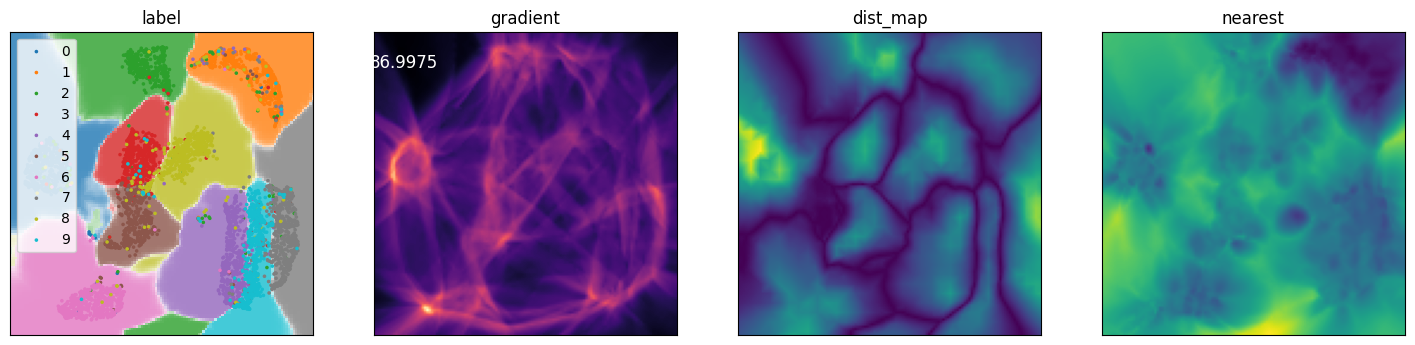

In [6]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [7]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
time accumulative: 0.0002663135528564453
time accumulative2: 0.07677721977233887
time called: 1
time total: 0.12027931213378906
slow strategy
time accumulative: 0.00022363662719726562
time accumulative2: 0.07228994369506836
time called: 1
time total: 0.15059399604797363
slow strategy
time accumulative: 0.00028705596923828125
time accumulative2: 0.07170438766479492
time called: 1
time total: 4.466655492782593
slow strategy
time accumulative: 0.00021505355834960938
time accumulative2: 0.06009244918823242
time called: 1
time total: 0.4335818290710449


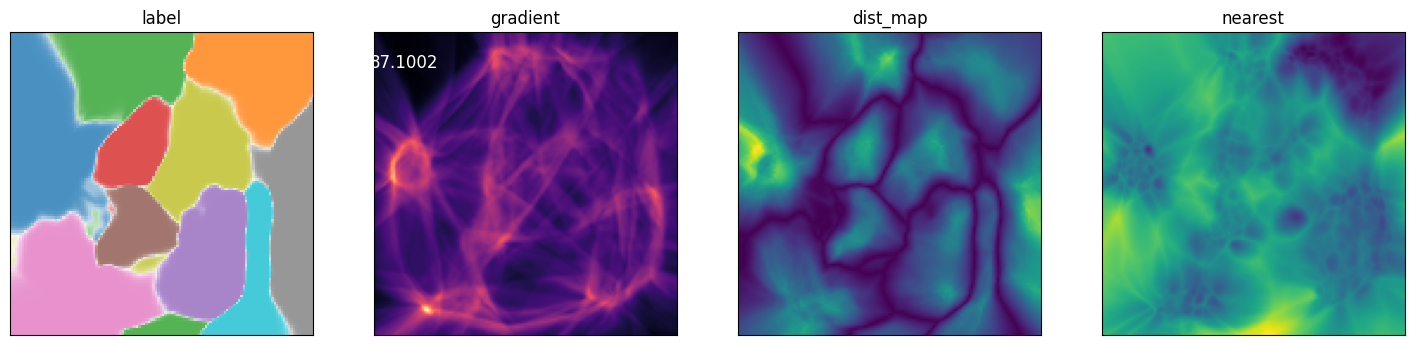

In [8]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
time accumulative: 0.0006225109100341797
time accumulative2: 1.4091246128082275
time called: 1
time total: 2.8793749809265137
fast strategy
threshold_abs: 0.8661099952935278
initial windows time: 0.3916921615600586
time_acc: 0.0014963150024414062 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0014963150024414062
time accumulative2: 0.26532483100891113
time called: 4
time total: 0.7456643581390381


[]

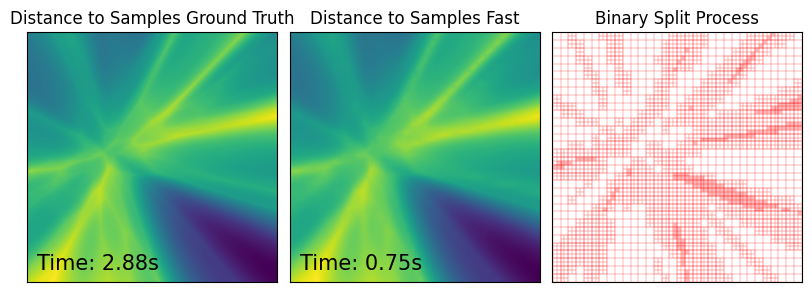

In [29]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.2)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.04, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='k')
ax[1].text(0.04, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='k')

ax[0].set_title('Distance to Samples Ground Truth')
ax[1].set_title('Distance to Samples Fast')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 0
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(-1, GRID), ylim=(-1, GRID))
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('figures/near2neighor.pdf', dpi=300)

# fig.savefig('results/figures/dist_map_umap_ssnp_t015.eps', dpi=300)
# fig.savefig('results/figures/dist_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0007867813110351562
time accumulative2: 1.2635986804962158
time called: 1
time total: 1.5870497226715088
1.58811616897583
fast strategy
threshold_abs: 17.71907958984375
initial windows time: 0.26597046852111816
time_acc: 0.0056285858154296875 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0056285858154296875
time accumulative2: 1.646693468093872
time called: 36
time total: 1.7304973602294922
1.7316198348999023


[]

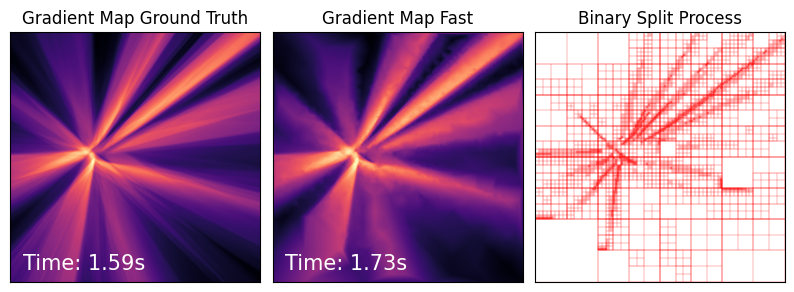

In [36]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256
threshold = 0.4
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID, plot_mean=False)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=4, threshold=threshold, plot_mean=False, reduced=False) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.05, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.05, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 0
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(0-1, GRID), ylim=(0-1, GRID))
# ax[2].axis('off')
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('results/figures/grad_map_ssnp_mnist_t015.eps', dpi=300)

# fig.savefig('results/figures/grad_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0006976127624511719
time accumulative2: 0.36556124687194824
time called: 1
time total: 0.675786018371582
0.6771750450134277
fast strategy
threshold_abs: 43.39016876220703
initial windows time: 0.01908588409423828
time_acc: 0.0032355785369873047 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0032355785369873047
time accumulative2: 0.20820212364196777
time called: 24
time total: 0.4498136043548584
0.45116448402404785


[(-5.0, 257.0), (-5.0, 257.0)]

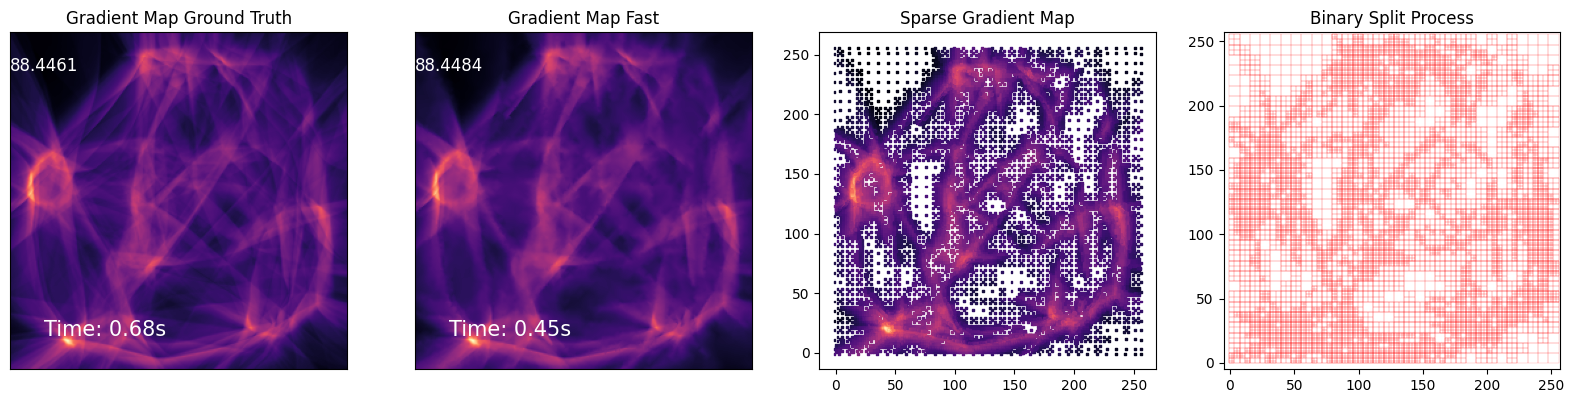

In [22]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 256
threshold = 0.15
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

t = 1
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# fig.savefig('figures/grad_map.pdf', dpi=300)


slow strategy
time accumulative: 0.0007410049438476562
time accumulative2: 0.19594264030456543
time called: 1
time total: 0.5014650821685791
0.5028140544891357
fast strategy
threshold_abs: 38.735783386230466
initial windows time: 0.031729698181152344
time_acc: 0.0009319782257080078 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0009319782257080078
time accumulative2: 0.09016180038452148
time called: 5
time total: 0.5631377696990967
0.5643887519836426


[(-5.0, 257.0), (-5.0, 257.0)]

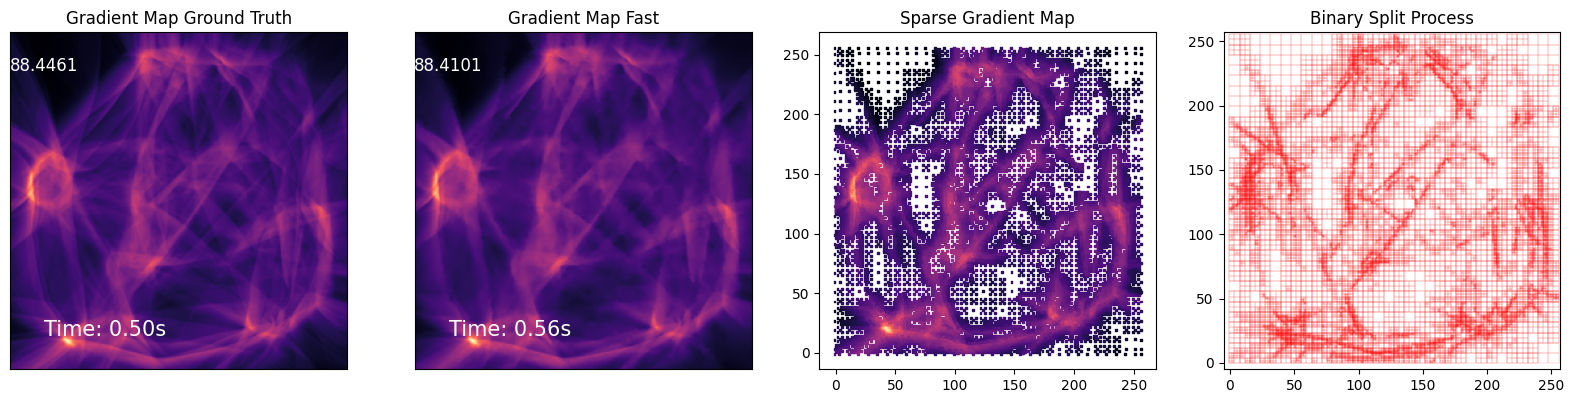

In [23]:
conten_list = ['label', 'gradient_reduced', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 256

# threshold = 0.2
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, reduced=True) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))


In [13]:
# conten_list = ['label', 'gradient', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# builder.plot_dist_map(ax[0],  fast=False, grid=256)
# builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=16)
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# # fig.savefig('figures/spares.png', dpi=300)


In [14]:
# conten_list = ['label', 'gradient', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 256

# time0 = time.time()
# builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
# time1 = time.time()
# # builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.5)
# time2 = time.time()
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
# ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
# ax[3].set_title('Binary Split Process')
# ax[3].set_aspect('equal')

# threshold = 0
# for item in sparse:
#     if item[-2] > threshold and item[-1] > threshold:
#         w, h = item[-1], item[-2]
#         ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
#         # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
#         # ax.set_xlim(0, GRID)
#         # ax.set_ylim(0, GRID)
#     # else:
#     #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
# ax[3].set(xlim=(-1, GRID), ylim=(-1, GRID))

# # fig.savefig('figures/near2neighor.pdf', dpi=300)
